# THU THẬP DỮ LIỆU BITCOIN

Dự đoán giá Bitcoin bằng mô hình LSTM
Người thực hiện: Doãn Hữu Huy


In [ ]:
# Cài thư viện cần thiết (chỉ chạy 1 lần duy nhất)
%pip install yfinance matplotlib pandas -q

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Tải giá Bitcoin từ 2017 đến hôm nay
print("Đang tải dữ liệu Bitcoin từ Yahoo Finance...")

btc = yf.download(
    tickers="BTC-USD",
    start="2017-01-01",
    end=datetime.today(),
    interval="1d"      # dữ liệu ngày
)

print(f"XONG! Tổng cộng: {len(btc)} ngày")
btc.tail()   # hiện 5 dòng cuối

Đang tải dữ liệu Bitcoin từ Yahoo Finance...


C:\Users\pv\AppData\Local\Temp\ipykernel_10984\717607785.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download(
[*********************100%***********************]  1 of 1 completed

XONG! Tổng cộng: 3263 ngày


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-12-03,93527.804688,94060.773438,91056.390625,91345.093750,77650204986
2025-12-04,92141.625000,94038.242188,90976.101562,93454.257812,64538402681
2025-12-05,89387.757812,92702.640625,88152.140625,92133.648438,63256398633
2025-12-06,89272.375000,90267.460938,88951.664062,89389.359375,37994042405
2025-12-07,89455.734375,89767.546875,87861.257812,89235.890625,38854672384


In [3]:
print("Kiểm tra dữ liệu bị thiếu:")
btc.isnull().sum()

Kiểm tra dữ liệu bị thiếu:


Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

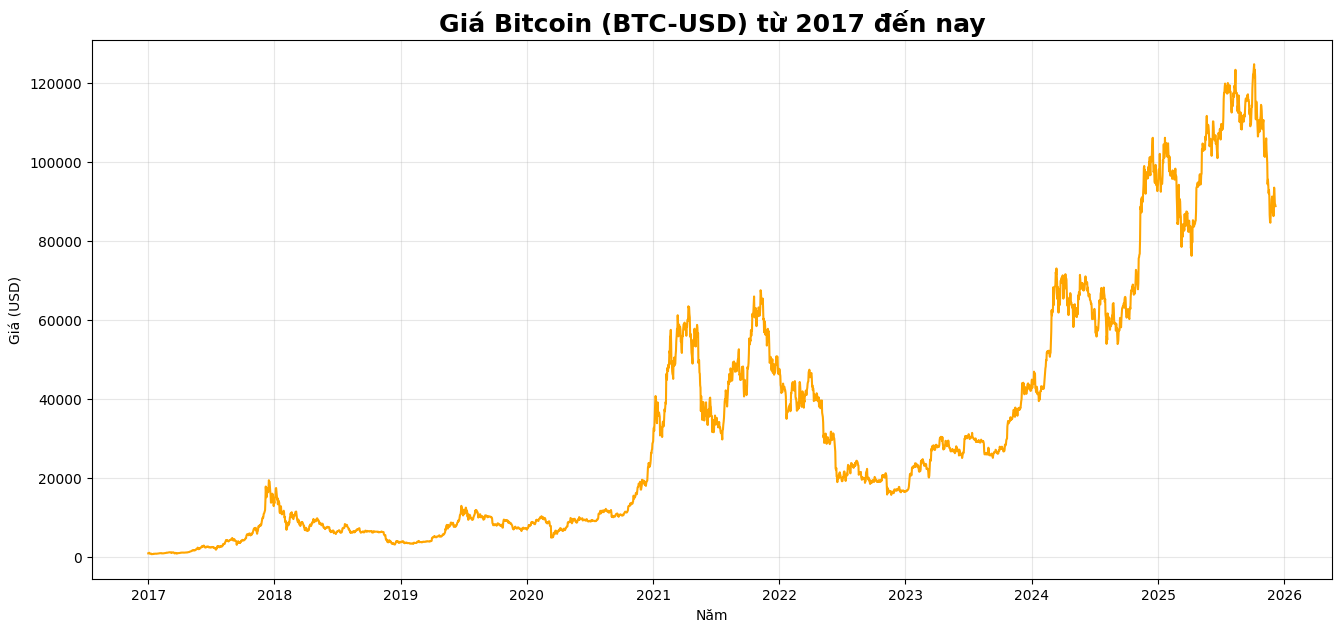

In [4]:
plt.figure(figsize=(16,7))
plt.plot(btc.index, btc['Close'], color='orange', linewidth=1.5)
plt.title('Giá Bitcoin (BTC-USD) từ 2017 đến nay', fontsize=18, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('Giá (USD)')
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
# Tạo thư mục data nếu chưa có
import os
os.makedirs("data", exist_ok=True)

# Lưu file CSV để dùng cho toàn bộ đồ án
btc.to_csv("data/BTC_USD_2017_2025_daily.csv")

print("ĐÃ LƯU THÀNH CÔNG!")
print("File nằm ở: data/BTC_USD_2017_2025_daily.csv")
print(f"Kích thước: {len(btc)} dòng")

ĐÃ LƯU THÀNH CÔNG!
File nằm ở: data/BTC_USD_2017_2025_daily.csv
Kích thước: 3263 dòng


In [ ]:
#
print("=== TỔNG KẾT DỮ LIỆU BITCOIN ===")
print(f"Số ngày quan sát          : {len(btc):,} ngày")
print(f"Giá thấp nhất             : ${btc['Close'].min().item():,.2f}")
print(f"Giá cao nhất              : ${btc['Close'].max().item():,.2f}")
print(f"Giá gần nhất ({btc.index[-1].strftime('%d/%m/%Y')}): ${btc['Close'].iloc[-1].item():,.2f}")

=== TỔNG KẾT DỮ LIỆU BITCOIN ===
Số ngày quan sát          : 3,263 ngày
Giá thấp nhất             : $777.76
Giá cao nhất              : $124,752.53
Giá gần nhất (07/12/2025): $88,842.88
